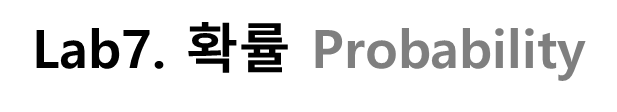

# 확률
  * 확률과 관련된 수학적 지식을 갖추지 않고 데이터 과학을 하는 것은 매우 어렵습니다.
  * 확률이란 어떤 사건의 공간에서 특정 사건이 선택될 때 발생하는 불확실성을 수치적으로 나타낸 것 입니다.

## 1. 종속과 독립
  * 사건 E의 발생 여부가 사건 F의 발생 여부에 대한 정보를 제공한다면 두 사건 E와 F는 종속사건(dependent events) 입니다.
  * 사건 E의 발생 여부가 사건 F의 발생 여부에 대한 정보를 제공하지 않는다면 두 사건 E와 F는 독립사건(independent events) 입니다.
  * 사건 E와 사건 F가 동시에 발생할 확률이 각각 사건이 발생할 확률의 곱과 같다면 두 사건은 독립사건 입니다.
    * P(E,F) = P(E)P(F)

## 2. 조건부 확률
  * 조건부 확률(conditional probability)이란 사건 F가 발생했을 경우, 사건 E가 발생할 확률 입니다.
    * P(E|F) = P(E,F) / P(F)
  * 사건 E와 F가 독립사건이라면 F가 발생 했을 때 E가 발생할 조건부 확률은 E가 발생할 확률과 같습니다.
    * P(E|F) = P(E)

### 예제 : 한 가족 안의 두 아이 성별 맞추기
  * 딸이거나 아들일 확률은 동일합니다.
  * 둘째의 성별은 첫째의 성별과 독립입니다.
    * 두 아이가 모두 딸이 아닌 확률: ¼
    * 딸 한 명과 아들 한 명인 확률: ½
    * 두 아이가 모두 딸인 확률: ¼ 
  * (Q1) 첫째가 딸인 경우(사건 G), 두 아이가 모두 딸일(사건 B) 확률은?
    * 사건 G: 첫 째가 딸인 경우 (F) (딸딸, 딸아들의 2 경우/총 4 경우)
    * 사건 B: 두 아이가 모두 딸일 확률 (E)
      * P(E|F) = P(E,F)/P(F)
      * P(B|G) = P(B,G)/P(G) = P(B)/P(G) = ¼ / ½ = 1/2 
  * (Q2) 딸이 최소 한 명인 경우(사건 L), 두 아이가 모두 딸일(사건 B) 확률은?
    * 사건 L: 딸이 최소 한 명인 경우 (F) (딸딸, 딸아들, 아들딸의 3 경우/총 4 경우)
    * 사건 B: 두 아이가 모두 딸일 확률 (E)
      * P(E|F) = P(E,F)/P(F)
      * P(B|G) = P(B,L)/P(L) = P(B)/P(L) = ¼ / ¾ = 1/3

In [1]:
from collections import Counter
import math, random

def random_kid():
    return random.choice(["boy", "girl"])

kid_test_list = [random_kid() for i in range(10)]
kid_test_list #random_kid 함수는 boy와 girl 두개의 값중에 하는 램덤하게 추출함

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl": # 큰 아이가 여자일 경우 +1
        older_girl += 1
    if older == "girl" and younger == "girl": #둘다 여자일 경우 +1
        both_girls += 1
    if older == "girl" or younger == "girl": #둘중에 하나라도 여자일경우 +1
        either_girl += 1

print ("P(both | older):", both_girls / older_girl)      # 0.514 ~ 1/2 # 큰 아이가 딸이고 둘다 딸일 확률
print ("P(both | either): ", both_girls / either_girl)   # 0.342 ~ 1/3 # 둘중에 한명이 딸이면서 둘 따 딸일 확률

P(both | older): 0.5007089325501317
P(both | either):  0.3311897106109325


## 3. 베이즈 정리
  * 두 확률변수의 사전 확률과 사후 확률 사이의 관계를 나타내는 정리로서, 이를 이용하면 사전 확률로부터 사후 확률을 구할 수 있습니다.
  * 사건 F가  발생했다는 가정하에 사건 E가 발생할 확률이 필요할 때, 사건 E가 발생했다는 가정하에 사건 F가 발생할 확률만 주어졌을 경우, 조건부 확률의 정의를 두 번 사용하면 다음과 같습니다.
    * P(E|F) = P(E,F)/P(F) = P(F|E)P(E)/P(F)
  * 사건 F를 ‘사건 F와 사건 E가 모두 발생하는 경우’와 ‘사건 F는 발생하지만 사건 E는 발생하지 않는 경우’ 두 상호 배타적인 사건으로 나눌 수 있습니다.　　　(¬E는 사건 E가 발생하지 않는 경우를 표현)
    * P(F) = P(F,E) + P(F,¬E)
    * P(E|F) = P(F|E)P(E)/[P(F|E)P(E) + P(F|¬E)P(¬E)]

### 예제
  * 10,000명 중 1명이 걸리는 질병이 있고, 질병이 있는 경우 ‘양성‘, 없는 경우 ‘음성＇이라고 판단하는 검사가 99% 정확도가 있을 경우
    * 사건 D (E) : 질병에 걸림
    * 사건 T (F) : 양성 판정을 받음
  * 양성 판정의 경우, 실제로 질병에 걸렸을 확률을 베이즈 정리를 사용해서 풀어보면 다음과 같습니다.
  * (베이즈 정리)        P(E|F) = P(F|E)P(E)/[P(F|E)P(E) + P(F|¬E)P(¬E)]
  * (베이즈 정리 예제) P(D|T) = P(T|D)P(D)/[P(T|D)P(D) + P(T|¬D)P(¬D)] = 0.98% < 1%
      * 0.99*0.0001/0.99*0.0001 + 0.01*0.9999 = 0.0098039
      * P(T/D) = 0.99 (질병에 걸린 사람이 양성 판정을 받을 확률)
      * P(D) = 1/10,000 = 0.0001 (특정한 사람이 질병에 걸릴 확률)
      * P(T/¬D) = 0.01 (질병이 없는 사람이 양성 판정을 받는 확률)
      * P(¬D) = 0.9999 (특정 사람이 질병에 걸리지 않았을 확률)
  * 양성 판정을 받은 사람 중 실제로 질병에 걸린 사람은 1%도 안 된다는 것을 의미합니다.

## 4. 확률변수
  * 확률변수란 특정 확률분포와 연관되어 있는 변수를 의미합니다.
    * (예) 동전의 앞면이 나오면 1이고, 동전의 뒷면이 나오면 0인 확률변수
  * 확률변수와 연관된 확률분포는 각 변수의 값에 해당되는 확률값을 계산해 줍니다.
    * (예) 동전던지기에서 값이 0인 확률변수와 1인 확률변수의 확률은 모두 0.5
    * (예) range(10) 각 확률변수의 값에 대한 확률은 0.1
  * 확률변수의 기대값(expected value)은 모든 확률변수의 확률을 해당 확률변수의 값으로 가중평균한 값입니다.
    * (예) 동전 던지기 확률변수의 기대값은 ½(=0*1/2 + 1*1/2)
    * (예) range(10) 확률변수의 기대값은 4.5

## 더 공부해 보고 싶다면
  * scipy.stats는 다양한 확률분포의 확률밀도함수와 누적분포함수를 구현해놓았습니다.

## (Lab7) 분포
  * 코딩해서 실행해보고 다양하게 변형해보세요.
    * 균등분포(uniform distribution)
    * 정규분포(normal distribution)
    * 표준정규분포(standard normal distribution)

  * 확률 밀도 함수(probability density function, pdf)는 밀도 함수를 특정 구간에서 적분한 값으로 확률을 나타내며 연속 분포를 표현합니다.
  * 누적 분포 함수(cumulative distribution function, cdf)는 확률변수의 값이 특정 값보다 작거나 클 확률을 나타내는데 더 자주 사용됩니다.

## 5. 균등분포
  * 균등분포(uniform distribution)는 0과 1 사이의 모든 값에 동등한 비중을 준 분포 입니다.

Populating the interactive namespace from numpy and matplotlib


C:\Users\oweny\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


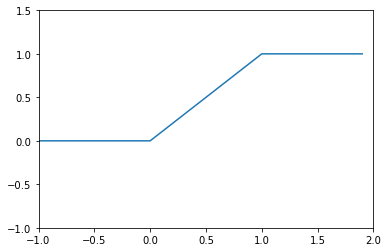

In [2]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

def uniform_cdf(x):
    "returns the probability that a uniform random variable is less than x"
    if x < 0:   
        return 0    # uniform random is never less than 0
    elif x < 1: 
        return x    # e.g. P(X < 0.4) = 0.4
    else:       
        return 1    # uniform random is always less than 1

import numpy as np
x = np.arange(-1.0, 2.0, 0.1)

result_array = np.vectorize(uniform_cdf, otypes=[np.float])(x)

import matplotlib.pyplot as plt
%pylab inline

plt.plot(x, result_array)
plt.axis([-1, 2, -1, 1.5])
plt.show()

## 6. 정규분포
  * 정규분포(normal distribution)는 그 유명한 종형 모양의 분포로서 다음 두 파라미터로 정의됩니다.
    * 평균 뮤 μ (mu) : 종의 중심
    * 표준편차 시그마 σ (sigma) : 종의 폭
  * 정규분포의 밀도 함수(normal distribution function)
  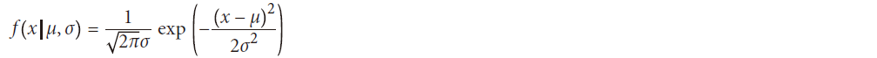

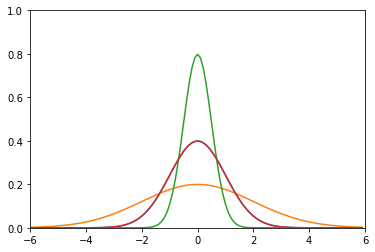

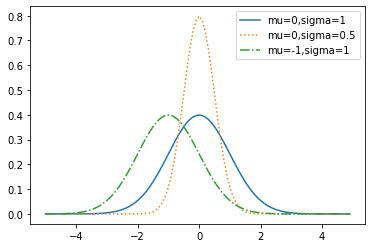

In [3]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

for sigma_value in [1,2,0.5,1]:
    x = np.arange(-6.0, 6.0, 0.1)
    result_array = np.vectorize(normal_pdf, otypes=[np.float])(x, sigma=sigma_value)
#     plt.plot(x, result_array, "ro")
    plt.plot(x, result_array)
    
plt.axis([-6, 6, 0, 1])
plt.show()

def plot_normal_pdfs(plt):
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
    plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs,[normal_pdf(x,mu=-1)   for x in xs],'-.',label='mu=-1,sigma=1')
    plt.legend()
    plt.show()   

import matplotlib.pyplot as plt
plot_normal_pdfs(plt)

## 7. 표준정규분포
  * 표준정규분포(standard normal distribution)는 평균 뮤가 0이고(μ = 0) 분산 시그마가 1인(σ = 1) 정규분포를 의미합니다.
  * 만약 Z가 표준정규분포의 확률변수를 나타낸다면, 확률변수 X도 평균이 뮤(μ)이고 표준편차가 시그마(σ)인 정규분포로 표현됩니다.
  * 반대로 X가 평균이 뮤(μ)이고 표준편차가 시그마(σ)인 정규분포의 확률변수를 나타낸다면, Z를 표준정규분포로 표현할 수 있습니다.

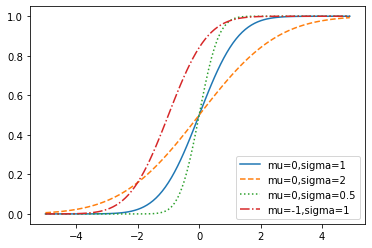

In [4]:
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

def plot_normal_cdfs(plt):
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
    plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
    plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
    plt.legend(loc=4) # bottom right
    plt.show()

import matplotlib.pyplot as plt
plot_normal_cdfs(plt)

### cf) 정규 분포 누적 분포 함수의 역함수
  * 특정 확률을 갖는 확률변수의 값을 찾기 위해 정규분포 누적 분포 함수 normal_cdf의 역함수가 필요할 수 있습니다.
  * 누적 분포 함수가 연속 및 증가 함수라는 점을 고려하면 이진 검색을 사용해 비교적 쉽게 값을 구할 수 있습니다.

In [5]:
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0            # normal_cdf(-10) is (very close to) 0
    hi_z,  hi_p  =  10.0, 1                # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # consider the midpoint
        mid_p = normal_cdf(mid_z)   # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break

    return mid_z

np.vectorize(inverse_normal_cdf, otypes=[np.float])([0, 0.5, 0.90, 0.95, 0.975, 1])
# 0%, 50%, 90%, 95%, 97.5%, 100%의 확률일경우 누적분포의 확률변수값

array([-8.75      ,  0.        ,  1.28155708,  1.64484978,  1.95996284,
        8.75      ])

### cf) 중심극한정리
  * 중심극한정리(central limit theorem)란 동일한 분포에 대한 독립적인 확률변수의 평균의 평균을 나타내는 확률변수가 대략적으로 정규분포를 따른다는 정리입니다.
  * 이항확률변수(binomial random variable)는 단순히 n개의 독립적인 베르누이 확률변수(Bernoulli random variable)를 더한 것입니다. 베르누이 확률변수의 평균은 p이며 표준편차는√(𝑝(1−𝑝))   입니다. 중심극한정리는 n인 적당히 크다면 이항 확률변수는 대략 평균이 μ = np 이고 표준편차가 "σ"=√(𝑛𝑝(1−𝑝)) 인 정규분포의 확률변수와 비슷해 집니다.

<ipython-input-6-da1a47944c66>:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return sum(bernoulli_trial(p) for _ in range(n))


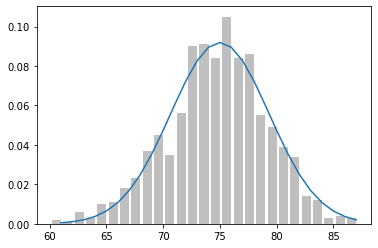

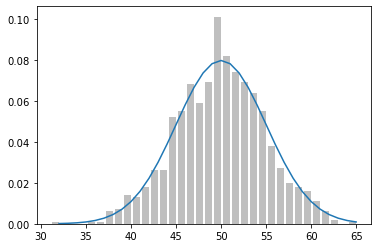

In [6]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(p, n):
    return sum(bernoulli_trial(p) for _ in range(n))

def make_hist(p, n, num_points):
    
    data = [binomial(p, n) for _ in range(num_points)]
    
    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) 
          for i in xs]
    plt.plot(xs,ys)
    plt.show()

make_hist(0.75,100,1000)
make_hist(0.50,100,1000)